In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 가격 예측 선형회귀분석
df = sns.load_dataset('diamonds')
df.tail(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [35]:
# 1. 결측치 확인

In [36]:
!pip install missingno

In [4]:
import missingno as msno

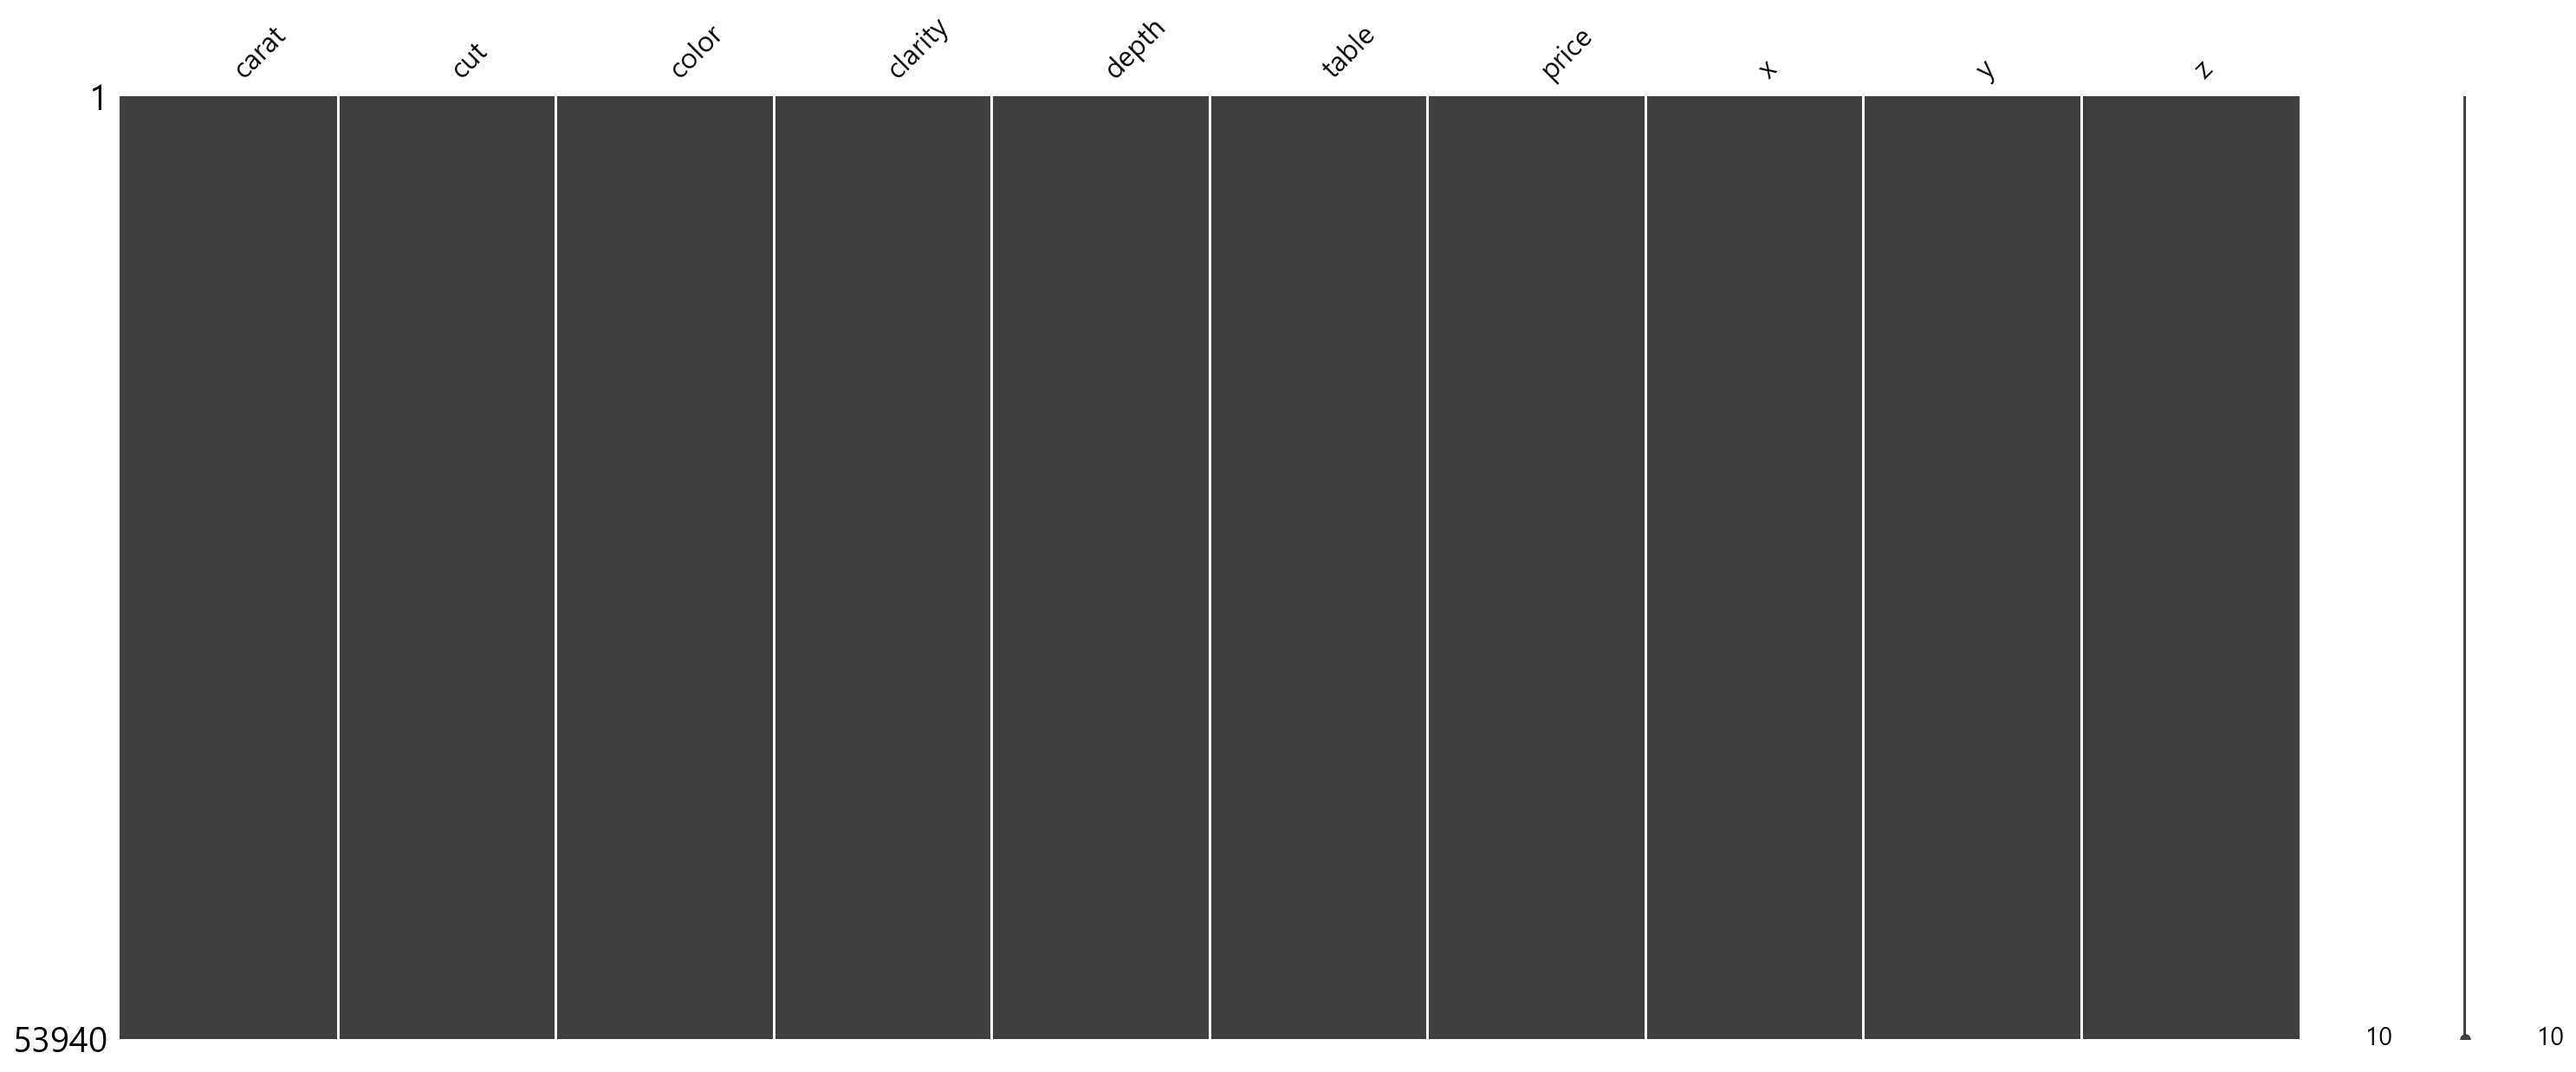

In [5]:
msno.matrix(df)
plt.show()

In [39]:
# 2. 데이터 전처리

# 2.1 숫자형 데이터 컬럼만 사용
# 2.2 더미 변수화
# 2.3 데이터셋 분리

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
# 범주형 데이터 카테고리별 데이터수
cut = df["cut"].value_counts()
cut

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
# 최빈값 구하기

In [9]:
# 0번째 인덱스
np.argmax(cut)

0

In [10]:
cut.index[np.argmax(cut)]

'Ideal'

In [11]:
# 2.1 숫자형 데이터 컬럼만 사용

In [27]:
columns, types = [], ["int64", "float"]

for column, dtype in df.dtypes.items():
    if dtype in types:
        columns.append(column)
        
# columns = [column for column, dtype in df.dtypes.items() if dtype in types]

df1 = df[columns]
df1.tail(2)

,carat,depth,table,price,x,y,z
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64


In [46]:
# 2.2 더미 변수화

In [28]:
# 범주형 컬럼 필터링
types = ["object", "category"]
columns = [column for column, dtype in df.dtypes.items() if str(dtype) in types]
columns

['cut', 'color', 'clarity']

In [29]:
# 더미변수화
dummies = [pd.get_dummies(df[column]) for column in columns]
dummies[0].tail(2)

,Ideal,Premium,Very Good,Good,Fair
53938,0,1,0,0,0
53939,1,0,0,0,0


In [30]:
# 데이터 프레임에 합치기
df2 = pd.concat([df, *dummies], axis=1).drop(columns=columns)
df2.tail(2)

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair,D,E,F,G,H,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
pd.options.display.max_columns = 30

In [32]:
df2.tail(2)

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair,D,E,F,G,H,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
# 2.3 데이터셋 분리

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
feature, target = df1.drop(columns=["price"]), df1["price"]
# feature, target = df2.drop(columns=["price"]), df1["price"]
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=1)

In [55]:
# 3. 모델 학습

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression().fit(train_x, train_y)

In [ ]:
# 4. 모델 예측 및 평가

In [38]:
# 테스트 데이터 예측
pred_y = model.predict(test_x).astype("int")
pred_y[-5:], test_y[-5:].values

(array([1117, 4208,  578,  478, 5016]),
 array([ 905, 3392,  802,  864, 4142], dtype=int64))

In [39]:
# 평가
from sklearn.metrics import mean_absolute_error

In [40]:
np.round(mean_absolute_error(pred_y, test_y), 3)

886.718

In [ ]:
# df1 : 886.718
# df2 : 733.923

In [ ]:
# 5. 시각화

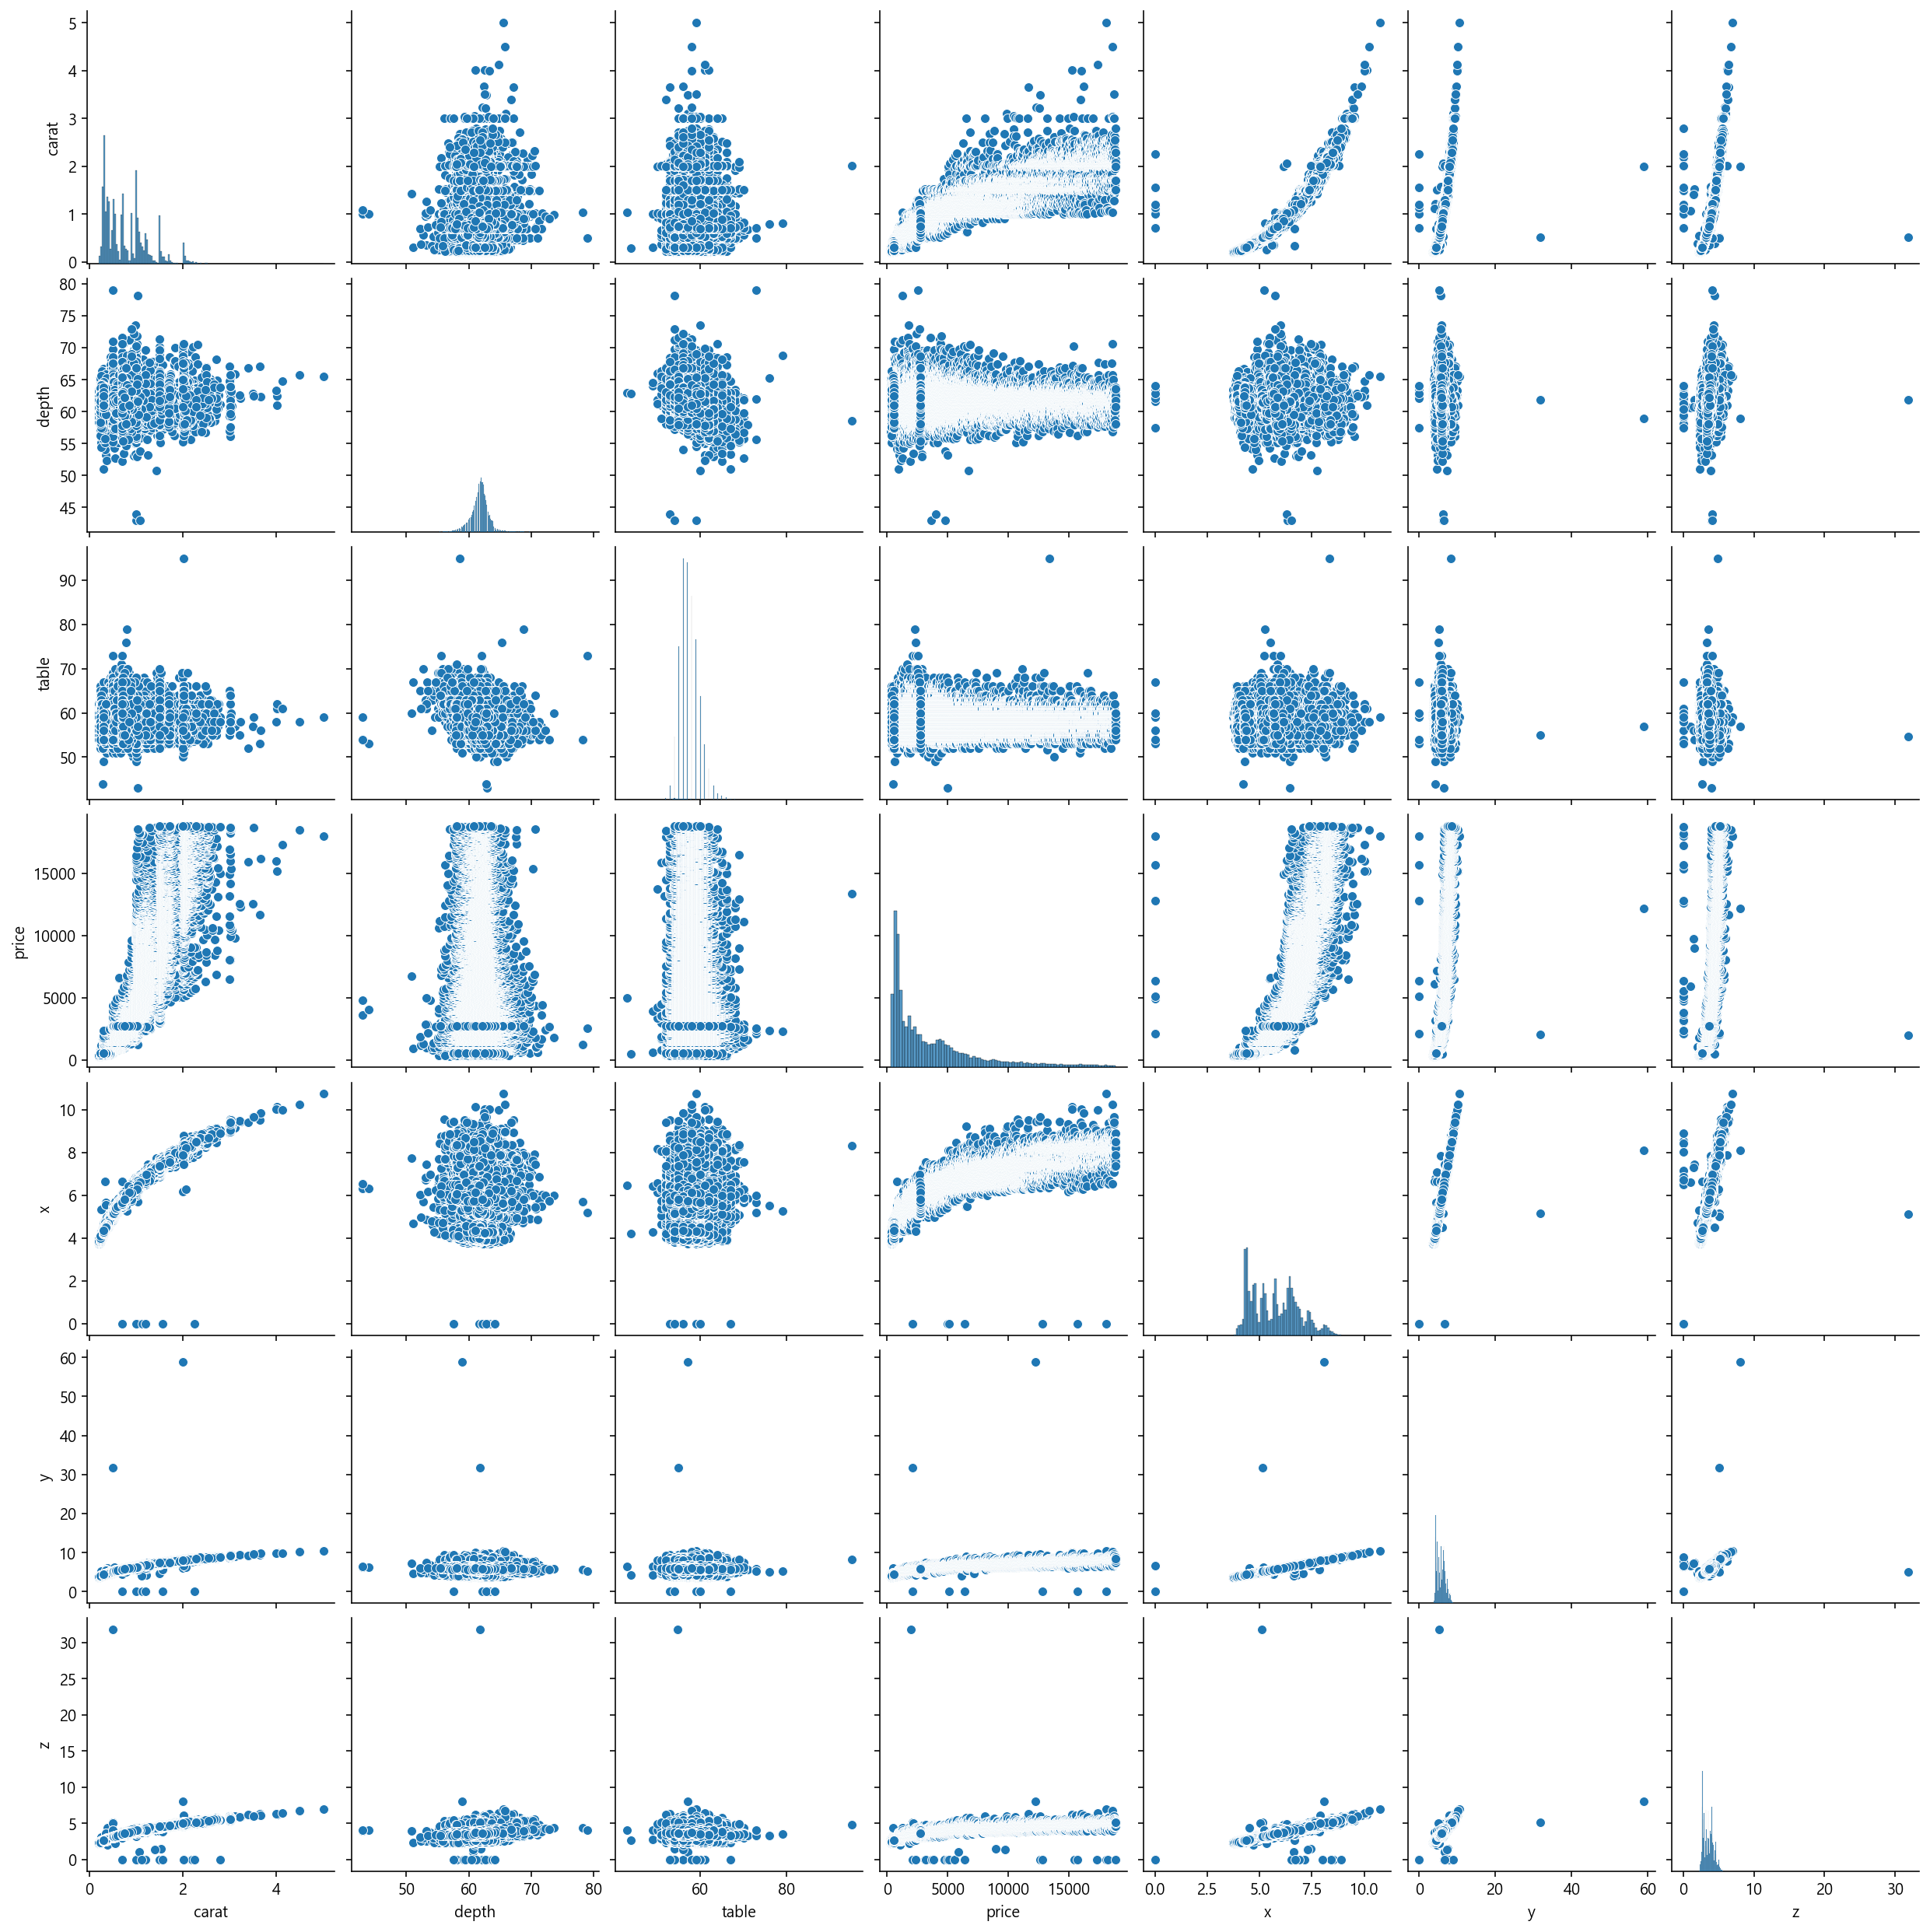

In [41]:
sns.pairplot(df1)
plt.show()

In [42]:
# 아웃라이어 제거
df3 = df1[(df1["x"] != 0) & (df1["y"] != 0) & (df1["z"] != 0) & (df1["y"] < 20) & (df1["z"] < 20)]
len(df1), len(df3), len(df1) - len(df3)

(53940, 53917, 23)

In [43]:
df3.reset_index(drop=True, inplace=True)

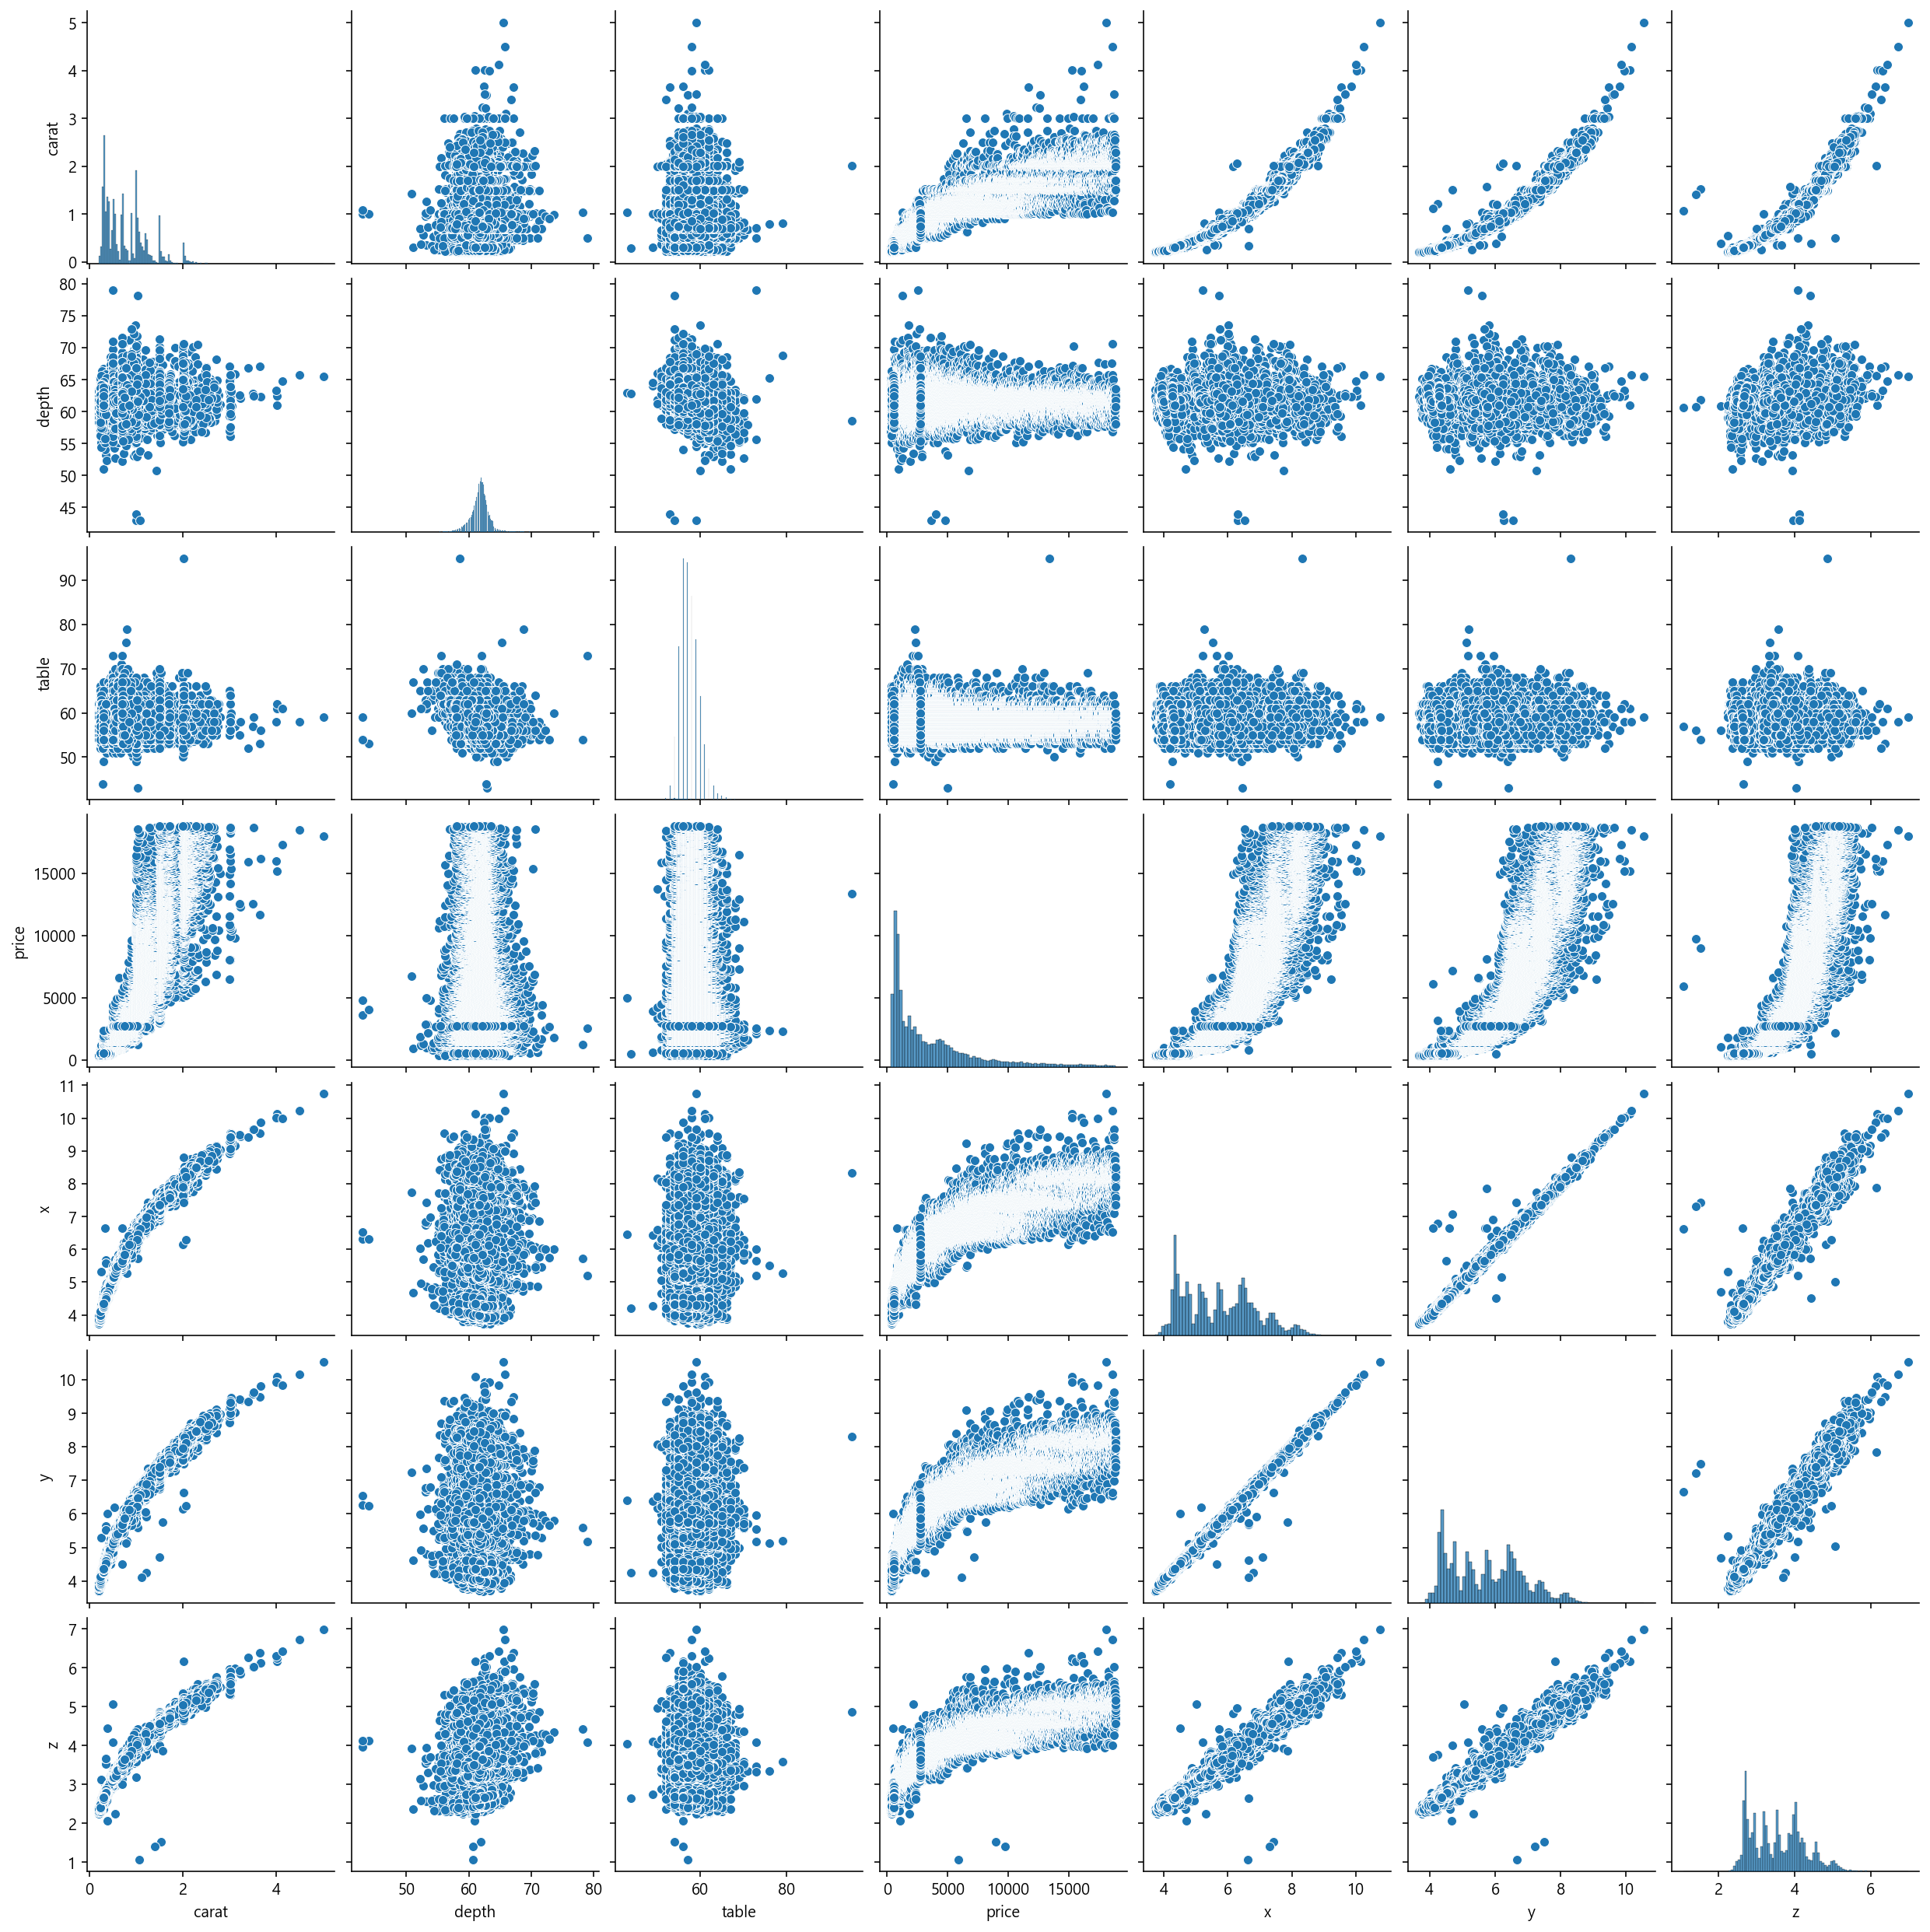

In [44]:
sns.pairplot(df3)
plt.show()

In [ ]:
# x, y, z 2차항 : 다항회귀 적용

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2차방정식

x_poly = poly_features.fit_transform(df3[["x"]])
y_poly = poly_features.fit_transform(df3[["y"]])
z_poly = poly_features.fit_transform(df3[["z"]])

xyz = np.c_[x_poly, y_poly, z_poly]
xyz_df = pd.DataFrame(xyz, columns=["x", "x2", "y", "y2", "z", "z2"])
xyz_df.tail(2)

,x,x2,y,y2,z,z2
53915,6.15,37.8225,6.12,37.4544,3.74,13.9876
53916,5.83,33.9889,5.87,34.4569,3.64,13.2496


In [47]:
df4 = pd.concat([df3.drop(columns=list("xyz")), xyz_df], axis=1)
df4.tail(2)

,carat,depth,table,price,x,x2,y,y2,z,z2
53915,0.86,61.0,58.0,2757,6.15,37.8225,6.12,37.4544,3.74,13.9876
53916,0.75,62.2,55.0,2757,5.83,33.9889,5.87,34.4569,3.64,13.2496


In [48]:
# 데이터셋 분리
feature, target = df4.drop(columns=["price"]), df4["price"]
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=1)

In [49]:
# 모델 학습
model = LinearRegression().fit(train_x, train_y)

In [50]:
# 모델 예측 및 평가

In [51]:
pred_y = model.predict(test_x).astype("int")
pred_y[-5:], test_y[-5:].values

(array([6021, 5216, 1839, 1638, 1547]),
 array([8204, 4863, 2075, 1098, 1882], dtype=int64))

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
np.round(mean_absolute_error(pred_y, test_y), 3)

822.635

In [ ]:
# df1 : 886.718 : 수치형 데이터만 사용
# df2 : 733.923 : 범주형 데이터 더미변수화 해서 사용
# df4 : 822.635 : df1 데이터에서 23개의 아웃라이어 제거 후 x,y,z 컬럼을 다항식으로 변경해서 사용

In [ ]:
# hw. df4에 범주형 데이터 더미변수화한 데이터 추가해서 모델 생성후 MAE 구하기
# 주의사항 : df4는 아웃라이어가 제거되어 df2의 dummies 데이터와 row의 갯수가 맞지 않음

In [54]:
df5 = pd.concat([df2.loc[df4.index], df4[["x2", "y2", "z2"]]], axis=1) 
df5.tail(2)

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair,D,E,F,G,H,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1,x2,y2,z2
53915,0.77,62.1,56.0,2753,5.84,5.86,3.63,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,37.8225,37.4544,13.9876
53916,0.74,63.1,59.0,2753,5.71,5.74,3.61,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,33.9889,34.4569,13.2496


In [55]:
# 데이터셋 분리
feature, target = df5.drop(columns=["price"]), df5["price"]
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=1)

In [56]:
model = LinearRegression().fit(train_x, train_y)

In [57]:
pred_y = model.predict(test_x).astype("int")

In [58]:
np.round(mean_absolute_error(pred_y, test_y), 3)

716.854